## 네이버뉴스

### 라이브러리 설치

In [3]:
!apt-get update
!apt-get install chromium-chromedriver
!pip install selenium webdriver_manager
!pip install selenium
!pip install beautifulsoup4
!pip install requests
!pip install pandas

zsh:1: command not found: apt-get
zsh:1: command not found: apt-get


In [27]:
# !pip uninstall selenium 
# !pip uninstall selenium
# !pip install selenium==2.48.0

  Using cached selenium-2.48.0-py3-none-any.whl


In [1]:
import time
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

import requests
from bs4 import BeautifulSoup

import csv 
import pandas as pd 
import re

### 웹 드라이브 사용하기

In [2]:
browser = webdriver.Chrome('./chromedriver')

In [3]:
#키워드 지정
keyword = "패션"

In [4]:
browser.get('https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query='+keyword)

In [5]:
#페이지 내리기
# 페이지 아래 부분으로 이동 - 더 많은 게시글을 확인하기 위해서
# 스크롤 전 높이
before_h = browser.execute_script("return window.scrollY") # 현재 스크롤 된 높이를 계산
maxInt = 10
# 무한 반복문 사용
loopNum = 0
while True:
    # 맨 아래로 스크롤을 내린다.
    browser.find_element(By.CSS_SELECTOR, "body").send_keys(Keys.END) # end키를 통해 스크롤을 맨 아래로 내림 

    # 스크롤 사이 페이지 로딩 시간 추가
    time.sleep(2)

    # 스크롤 후 높이 확인 
    after_h = browser.execute_script("return window.scrollY")

    # before_h = after_h # after의 높이를 before로 갱신

    if after_h > 10000 or loopNum > maxInt: # 스크롤 높이보다 높으면 멈춤 - 해당 사이즈를 늘리면 더 많은 데이터를 가져올 수 있다.
        #스크롤 내리는 횟수가 maxInt보다 많아지면 멈추기
        break
    loopNum += 1
    

<html data-platform="macintel" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/124.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"> <meta content="always" name="referrer"> <meta content="telephone=no,address=no,email=no" name="format-detection"> <meta content="패션 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"> <meta content="'패션'의 네이버 뉴스검색 결과입니다." property="og:description"> <meta content="'패션'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"> <title>패션 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" src="https://ntm.pstatic.net/s
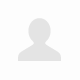
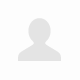

In [12]:
# 페이지 소스 출력
html = browser.page_source
html_source = BeautifulSoup(html, 'html.parser')
print(html_source)

In [17]:
#뉴스 타이틀 가져오기
titleList = []
newsTitle = html_source.find_all("a", class_ = "news_tit")
for eachTitle in newsTitle:
    titleList.append(eachTitle.get_text())
    print(eachTitle.get_text())

삼성물산 패션 시프트 G, 롯데백화점 본점 입성
퓨처버스, 맞춤형 AI패션 ‘리복 임팩트’ 내놔
300만원에 빌릴 거면 7만원 주고 산다…MZ신부들 "비싼 웨딩드레스 그만"
'소비 침체'에 또다시 휘청한 K패션업계…1분기 실적 하락 이어져
'멧갈라' 패션쇼할 때냐…가자 참상 침묵한 美셀럽에 SNS 보이콧
크래비티, 패션 브랜드 새 얼굴 "새로운 활력"
[부산소식] 신세계 센텀시티, 지역상생 위한 '부산패션마켓' 열어
[MD포토] 제로베이스원 박건욱, '화려한 패션센스'
요즘 패션 성지는 이곳 ‘도산공원’… K패션 하이엔드 3대장 다 모였다
지그재그, 4월 '퀵 배송' 주문량 역대 최대…“패션 당일 배송 시대 이끈다”
화사, 속옷 드러낸 파격 패션 '아찔'
지그재그, 4월 '퀵 배송' 주문량 역대 최대…“패션 당일 배송 시대 이끈다”
'8㎏ 감량' 소유, 하의실종 패션…극강의 섹시美
“드레스가 1만원”…웨딩업계 덮친 패스트패션
[ET포토] 제로베이스원 김태래, '슬림한 블랙 패션'
삼성물산 패션 샌드사운드, 성수서 보이넥스트도어와 협업 팝업
소유, 빨강 장화에 하의실종 패션…쿨한 매력
'논란 일색' 멧 갈라, K팝 그룹 인종차별·코르셋 패션·AI 조작까지
'힙한 꽃중년' 패션업계 새 트렌드로
[영상] '웃통 패션' 따라했던 쇼이구 내치고 '미필' 국방 앉힌 푸틴, 왜
소비침체에 휘청…패션업계, 4조 냉감 시장 선점 노린다
호남대 패션디자인학과, ‘맞춤형 취업특강’
[단독] 유니클로, 국내에도 패션 스타일 검색 앱 ‘스타일힌트’ 선보인다
'50대' 엄정화, '과감' 시스루 패션…"하나 하나 벗으면서" (엄정화TV)
[패션뉴스] '나이키 강남' 리뉴얼 오픈
LF 보리보리, 패션위크 프로모션 실시
"LA 언니들 패션 한눈에" SPA브랜드 '샵사이다' 팝업 열려
부산 신세계 센텀시티, 지역상생 '패션마켓' 개최…18일까지
‘함부로 대해줘’ 배종옥, 패션업계 거장 됐다...우아한 카리스마
"패션 유튜버 직접나선 오너 2세" 창립 50주년 세정 박이라 사장 [차세대 유통.

In [19]:
#뉴스 요약 가져오기
summaryList = []
newsSummary = html_source.find_all("a", class_ = "api_txt_lines dsc_txt_wrap")
for eachSummary in newsSummary:
    summaryList.append(eachSummary.get_text())
    print(eachSummary.get_text())

삼성물산(028260) 패션부문의 유틸리티 워크웨어 브랜드 시프트 G(Shift G)는 롯데백화점 본점에 입성한다고 14일 밝혔다. 강남·여의도 핵심 거점에 이어... 이시영 시프트 G 팀장은 "올해 패션시장에 워크웨어 트렌드가 강하게 오면서 젊은 층 사이에서 유틸리티 워크웨어에 대한 관여도가 높아지고 있다"며...
퓨처버스가 상징적이고 독창적인 스포츠 문화 브랜드 ‘리복’과 인스타그램을 통한 맞춤형 AI 패션 경험인 ‘리복 임팩트’를 출시했다. 리복... 리복 임팩트를 통해 디지털 패션 환경을 혁신하고, 고객에게 독특하고 몰입감 있는 경험을 제공할 수 있기를 기대한다”고 말했다. 퓨처버스 관계자는...
패스트패션 업체들이 시장에 속속 진출하면서 예비 신부들이 저렴한 가격에 웨딩드레스를 살 수 있게 된 것이다. 연합뉴스는 12일(현지시간) CNN방송을 인용 "최근 미국 패션업체들이 결혼 비용을 절감하려는 MZ세대를 위해 저렴한 웨딩드레스를 판매하고 있다"고 보도했다. 일반적으로 고가의...
국내 주요 패션 기업들이 올해 1분기 우울한 성적표를 받았다. 고금리·고물가 기조가 이어지면서 소비 심리가 회복되지 않은 탓으로 보인다. 13일 패션업계에 따르면 삼성물산 패션부문을 비롯해 한섬, F&F(에프앤에프), 코오롱인더스트리 FnC 등 주요 패션 업체의 올해 1분기 영업이익이 전년 같은 기간...
이들 유명인에 대한 반감은 이스라엘의 가자 남부 도시 라파에 대한 군사공격 계획이 발표된 시점과 미국 최대 패션쇼인 '멧 갈라' 개최 시기가 겹치면서 더욱 커졌다. 특히 유명 모델이자 소셜미디어 제작자인 헤일리 칼릴이 프랑스혁명 당시 마리 앙투아네트 왕비가 했다는 '(빵이 없으면) 케이크를 먹으면...
크래비티가 패션브랜드 앰배서더로 발탁됐다. 한 패션 브랜드는 13일 크래비티와 함께한 화보를 공개하고 앰배서더 발탁 소식을 알렸다. 화보 속 크래비티는 각자의 개성이 잘 드러나는 캐주얼한 스타일링과 더불어 맑고 청량한 소년미를 발산해 단번에 이목을 사로잡았다. 크래비티는..

In [20]:
#뉴스 링크 가져오기
linkList = []
newsLinks = html_source.find_all("a", class_ = "news_tit")
for eachLink in newsLinks:
    linkList.append(eachLink.attrs['href'])
    print(eachLink.attrs['href'])

https://www.news1.kr/articles/5414903
https://www.joongang.co.kr/article/25249268
https://view.asiae.co.kr/article/2024051313445447489
https://www.newsis.com/view/?id=NISX20240513_0002733539&cID=13001&pID=13000
https://www.yna.co.kr/view/AKR20240513079300009?input=1195m
https://news.jtbc.co.kr/article/article.aspx?news_id=NB12195904
https://www.ajunews.com/view/20240513103144162
https://mydaily.co.kr/page/view/2024051315325861756
https://www.mk.co.kr/article/11015223
https://www.etnews.com/20240514000129
http://www.wowtv.co.kr/NewsCenter/News/Read?articleId=A202405130235&t=NN
https://www.etnews.com/20240514000129
https://www.newsis.com/view/?id=NISX20240513_0002733444&cID=10601&pID=10600
https://view.asiae.co.kr/article/2024051314253555052
https://www.etnews.com/20240513000400
https://www.dailian.co.kr/news/view/1360552/?sc=Naver
https://www.moneys.co.kr/article/2024051410181382167
https://www.ytn.co.kr/_ln/0104_202405121400014776
https://www.busan.com/view/busan/view.php?code=20240512

In [21]:
#가져온 정보 확인 가져오기
print(len(titleList))
print(len(summaryList))
print(len(linkList))


70
70
70


In [22]:
naverNewsDF = pd.DataFrame({'title': titleList,'summary':summaryList,'link':linkList})
naverNewsDF.to_csv('./Data/naverNewsDF.csv')